In [1]:
# Load the datasets
setwd('C:/Users/yizhe/Desktop/MDS/Term4/data_550/miniposter/')
air <- read.csv("air.csv")
source("airports.R")
source("cancellations.R")
source("FlightBehaviour.R")

In [2]:
dim(air)

[1] 7001975      29

In [33]:
head(air)

X,Dest,Origin,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1,ABE,ORD,3,22,6,1342,1350,1629,1637,...,2,22,0,,0,NA,NA,NA,NA,NA
2,ABE,CLT,1,5,6,2034,1945,2155,2117,...,6,14,0,,0,38,0,0,0,0
3,ABE,ORD,11,29,6,1837,1836,2127,2120,...,3,22,0,,0,NA,NA,NA,NA,NA
4,ABE,DTW,3,21,5,1006,1008,1123,1140,...,9,10,0,,0,NA,NA,NA,NA,NA
5,ABE,ORD,10,3,5,1803,1806,2040,2055,...,5,12,0,,0,NA,NA,NA,NA,NA
6,ABE,DTW,7,22,2,1005,1007,1126,1140,...,5,14,0,,0,NA,NA,NA,NA,NA


In [34]:
winter_day <- subset(air, Month==12)
day <- 25
if (!is.null(day)){
    winter_day <- subset(winter_day, DayofMonth==day)
}

In [35]:
NNA_wd <- winter_day[complete.cases(winter_day[ , 'WeatherDelay']),]

In [36]:
NNA_wd <- subset(NNA_wd, WeatherDelay > 0)

In [37]:
head(sort(table(NNA_wd$Origin),decreasing = T),10)


SEA SLC ORD LAS PDX DEN RNO PHX GEG MDW 
 44  41  31  20  13  11  11   9   7   6 

In [38]:
head(sort(table(NNA_wd$Dest),decreasing = T),10)


LAS DEN PHX ORD SLC DFW IAH LAX PDX BOI 
 31  15  15  14  14  13  11  11   8   7 

In [39]:
# Exploring dataset
ori_name <- unique(NNA_wd$Origin)
dest_name <- unique(NNA_wd$Dest)

In [40]:
# Adding latitude and longitude information from the airport.R dataframe to our air dataframe
listofdfs <- list()
for(item in ori_name){
    latOrigin <- subset(airports,iata_code==item)['latitude_deg'][1,]
    longOrigin <- subset(airports,iata_code==item)['longitude_deg'][1,]
    s <- subset(NNA_wd, Origin==item)
    s$latOrigin <- latOrigin
    s$longOrigin <- longOrigin
    listofdfs[[item]] <- s
}


NNA_wd <- do.call("rbind", listofdfs)

listofdfs <- list()
for(item in dest_name){
    latDest <- subset(airports,iata_code==item)['latitude_deg'][1,]
    longDest <- subset(airports,iata_code==item)['longitude_deg'][1,]
    s <- subset(NNA_wd, Dest==item)
    s$latDest <- latDest
    s$longDest <- longDest
    listofdfs[[item]] <- s
}
NNA_wd <- do.call("rbind", listofdfs)

In [41]:
head(airports)

,latitude_deg,longitude_deg,elevation_ft,iata_code,NDepartures,NArrivals,Cancelled
25947,40.6521,-75.4408,393,ABE,4807,4795,152
25948,32.4113,-99.6819,1791,ABI,2660,2661,43
25949,35.0402,-106.6090,5355,ABQ,41146,41144,333
25951,31.5355,-84.1945,197,ABY,1095,1095,17
25954,41.2531,-70.0602,47,ACK,457,469,38
25957,31.6113,-97.2305,516,ACT,1993,1994,74


In [42]:
dest_count <- as.data.frame(table(NNA_wd$Dest))
head(dest_count)

Var1,Freq
ABE,0
ABI,0
ABQ,3
ABY,0
ACK,0
ACT,0


In [43]:
origin_count <- as.data.frame(table(NNA_wd$Origin))
head(origin_count)

Var1,Freq
ABE,0
ABI,0
ABQ,2
ABY,0
ACK,0
ACT,0


In [44]:
total_count <- merge(dest_count, origin_count, by="Var1")
total_count$total <- total_count$Freq.x + total_count$Freq.y
colnames(total_count) <- c("iata_code","dest_count","origin_count","total_delay_counts")

In [45]:
head(total_count)

iata_code,dest_count,origin_count,total_delay_counts
ABE,0,0,0
ABI,0,0,0
ABQ,3,2,5
ABY,0,0,0
ACK,0,0,0
ACT,0,0,0


In [46]:
new_airports <- merge(airports, total_count, by="iata_code")
top_10 <- head(new_airports[order(new_airports$total_delay_counts, decreasing = T),], 10)

In [47]:
top_10

,iata_code,latitude_deg,longitude_deg,elevation_ft,NDepartures,NArrivals,Cancelled,dest_count,origin_count,total_delay_counts
266,SLC,40.7884,-111.9780,4227,139086,139077,1090,14,41,55
156,LAS,36.0801,-115.1520,2181,172876,172871,2057,31,20,51
257,SEA,47.4490,-122.3090,433,109069,109075,1142,5,44,49
211,ORD,41.9786,-87.9048,672,350380,350452,15050,14,31,45
81,DEN,39.8617,-104.6730,5431,241442,241470,2725,15,11,26
220,PHX,33.4343,-112.0120,1135,199408,199416,1875,15,9,24
217,PDX,45.5887,-122.5980,31,57860,57858,652,8,13,21
82,DFW,32.8968,-97.0380,607,281281,281401,7272,13,4,17
158,LAX,33.9425,-118.4080,125,215608,215685,2838,11,4,15
242,RNO,39.4991,-119.7680,4415,24286,24274,256,3,11,14


In [48]:
collection <- c()
i <- 1
for(item in top_10$iata_code){
    collection[i] <- mean(subset(NNA_wd, Dest==item|Origin==item)$WeatherDelay)
    i <- i+1
}
top_10_mean_delay <- as.matrix(collection)
top_10_mean_delay <- as.data.frame(top_10_mean_delay)
colnames(top_10_mean_delay) <- "mean_delay"
top_10 <- cbind(top_10, top_10_mean_delay)
added_data <- top_10[,c("iata_code","mean_delay")]

In [49]:
airports_plot <- merge(new_airports, added_data, by="iata_code", all.x=T)

In [50]:
airports_plot[is.na(airports_plot)] <- 0

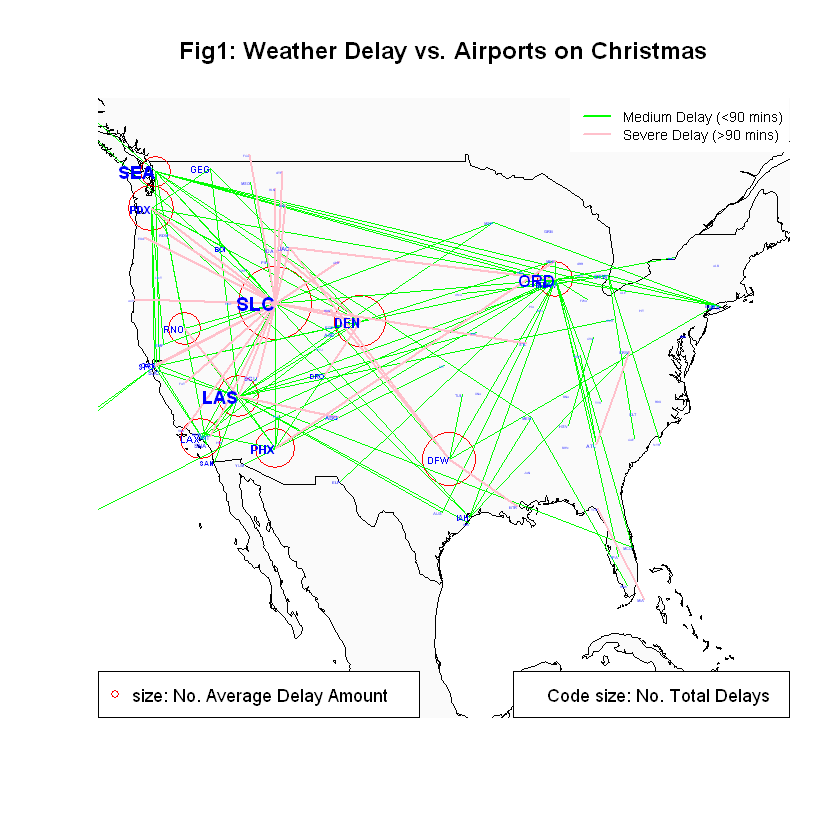

In [51]:
# Map plot to visualize the delayed flight routes caused by extreme weather condition
# The code size indicates the total number of weather-delayed flights associated with that airport, the larger the code size, 
# the more weather-delayed flights are related to the airport, therefore the more likely the delay is due to the 
# weather condition at that aiport 
# The circle size shows the amount of average weather delay experienced per flight at that airport. It can potentially indicate
# how bad the weather could be at that airport. The worse the weather, the more average delay per flight might experience

colfunc <- colorRampPalette(c("green","red"))
library(rworldmap)
newmap <- getMap(resolution = "low")
plot(newmap,  ylim=c(21, 50), xlim=c(-125, -69),col = "gray98", asp=1.6)
par(new=TRUE)

plot(latitude_deg ~ longitude_deg, data = airports_plot,
cex=sqrt(mean_delay)/1.2, ylim=c(21, 50), xlim=c(-125, -70), axes=FALSE, xlab="", ylab="", col="red") 

title("Fig1: Weather Delay vs. Airports on Christmas")



legend("bottomleft", legend=c("size: No. Average Delay Amount"), pch=c(1), col="red",cex=0.9)
legend("bottomright", legend=c("Code size: No. Total Delays"), cex=0.9)


with(subset(NNA_wd, WeatherDelay>15 & WeatherDelay<90), segments(longOrigin, latOrigin,
longDest, latDest, col="green", lwd=1.5))

with(subset(NNA_wd, WeatherDelay>90), segments(longOrigin, latOrigin,
longDest, latDest, col="pink", lwd=2))


text(latitude_deg ~ longitude_deg, label=iata_code, data = subset(airports_plot, total_delay_counts>0), 
     ylim=c(21, 50), xlim=c(-125, -65),cex=sqrt(total_delay_counts)/8, adj=1, col="blue", font=2)

legend("topright", legend=c("Medium Delay (<90 mins)", "Severe Delay (>90 mins)"),
       col=c("green", "pink"), lty=1, lwd=c(2,2), cex=0.7, box.lty=0)

In [52]:
# The top 5 obvious airports with bad weather on Christmas day in 2008 are SLC, LAS, SEA, ORD and DEN
# Salt Lake City is definitely the worst airport with the probability of having the worst weather on that day
# since it has both the largest number of weather-delayed flights and the highest average delayed time per flight

# However, this is a single analysis on a particular day... How about the overall condition for the entire month?
# Is SLC still the worst?

In [ ]:
# Compute the weather dealyed frequency 
counts <- list()
winter_day <- subset(air, Month==12)
max_num <- max(winter_day$DayofMonth)
for(day in seq(max_num)){
    

winter_day <- subset(winter_day, DayofMonth==day)


NNA_wd <- winter_day[complete.cases(winter_day[ , 'WeatherDelay']),]
NNA_wd <- subset(NNA_wd, WeatherDelay > 0)



# Exploring dataset
ori_name <- unique(NNA_wd$Origin)
dest_name <- unique(NNA_wd$Dest)

# Adding latitude and longitude information from the airport.R dataframe to our air dataframe
listofdfs <- list()
for(item in ori_name){
    latOrigin <- subset(airports,iata_code==item)['latitude_deg'][1,]
    longOrigin <- subset(airports,iata_code==item)['longitude_deg'][1,]
    s <- subset(NNA_wd, Origin==item)
    s$latOrigin <- latOrigin
    s$longOrigin <- longOrigin
    listofdfs[[item]] <- s
}


NNA_wd <- do.call("rbind", listofdfs)

listofdfs <- list()
for(item in dest_name){
    latDest <- subset(airports,iata_code==item)['latitude_deg'][1,]
    longDest <- subset(airports,iata_code==item)['longitude_deg'][1,]
    s <- subset(NNA_wd, Dest==item)
    s$latDest <- latDest
    s$longDest <- longDest
    listofdfs[[item]] <- s
}
NNA_wd <- do.call("rbind", listofdfs)

dest_count <- as.data.frame(table(NNA_wd$Dest))
origin_count <- as.data.frame(table(NNA_wd$Origin))

total_count <- merge(dest_count, origin_count, by="Var1")
total_count$total <- total_count$Freq.x + total_count$Freq.y
colnames(total_count) <- c("iata_code","dest_count","origin_count","total_delay_counts")

new_airports <- merge(airports, total_count, by="iata_code")
top_5 <- head(new_airports[order(new_airports$total_delay_counts, decreasing = T),], 5)

collection <- c()
i <- 1
for(item in top_5$iata_code){
    collection[i] <- mean(subset(NNA_wd, Dest==item|Origin==item)$WeatherDelay)
    i <- i+1
}
top_5_mean_delay <- as.matrix(collection)
top_5_mean_delay <- as.data.frame(top_5_mean_delay)
colnames(top_5_mean_delay) <- "mean_delay"
top_5 <- cbind(top_5, top_5_mean_delay)
added_data <- top_5[,c("iata_code","mean_delay")]

airports_plot <- merge(new_airports, added_data, by="iata_code", all.x=T)

airports_plot[is.na(airports_plot)] <- 0

counts[[day]] <- top_5$iata_code

}

In [ ]:
df <- counts[[1]]
for(i in seq(2:31)){
    df <- rbind(df, counts[[i]])
}

data <- table(df)
colfunc <- colorRampPalette(c("purple", "violet"))


xx <- barplot(head(sort(data,decreasing = T),8), cex.names=1,
       col=colfunc(8), ylab='Weather-Delay Frequency in December', xlab='Airport Code', ylim=c(0,31))

values <- c("Chicago","Atlanta","Dallas","Hebron","Denver","Detroit","Newark","Houston")

y <- head(sort(data,decreasing = T),8)

text(xx, y+1.8, label = values, cex = 1, col = "black", srt=30)
title('Fig2: Top 8 Weather-Delayed Airports in December?', cex = 1.5,   font.main= 2, line=-0.2)


In [ ]:
names(y)

In [ ]:
# After iterating the above analysis for every single day in December, I performed a summarization and plotted the top 8 
# weather-delayed airports for the month. Clearly, ORD, ATL, and IAH are on average the top 3 common airports with weather delays 
# in December, which could suggest that for your next year's winter travel, they may not be among your top choice list 
# not only because there is a large chance for you to experience weather delay at the airports 
# but also you may be less likely to enjoy the weather in the city.

In [ ]:
unique(air$Dest)